 # Flowers Recognition: Klasifikasi Gambar Bunga Menggunakan Machine Learning

- **Nama:** Sion Saut Parulian Pardosi
- **Email:** spardosi12@gmail.com
- **Email Dicoding:** mc114d5y1919@student.devacademy.id
- **ID Dicoding:** MC114D5Y1919

-- -

Pada tahap ini, saya akan menjelaskan secara singkat tujuan dan alasan mengapa proyek ini penting. Proyek ini bertujuan mengembangkan sebuah model yang mampu mengenali dan mengklasifikasikan berbagai jenis bunga berdasarkan citra. Dengan klasifikasi otomatis, kita dapat membantu industri pertanian dan hortikultura dalam proses identifikasi bunga, mendukung penelitian botani, serta meningkatkan efisiensi dalam pemantauan keanekaragaman hayati.

Tujuan Proyek: Menyusun dan melatih model deep learning untuk mengklasifikasikan gambar bunga ke dalam beberapa kategori.

Latar Belakang: Identifikasi manual bunga memerlukan keahlian khusus dan waktu yang lama. Melalui metode deep learning, kita dapat mempercepat proses ini, meminimalkan kesalahan manusia, serta mendorong inovasi dalam bidang agrikultur dan konservasi lingkungan.

Alur Kerja: Secara garis besar, langkah yang saya lakukan adalah: memuat dataset → melakukan pra-pemrosesan gambar → merancang arsitektur model CNN → melatih model → mengevaluasi performa → melakukan prediksi pada sampel baru.

#

## Import Semua Packages/Library yang Digunakan

#### Di bagian ini, saya menyiapkan semua library dan parameter yang diperlukan agar notebook dapat berjalan tanpa hambatan.

Instalasi Library (jika belum terpasang):

In [ ]:
!pip install tensorflow keras numpy pandas matplotlib scikit-learn

Import Modul:

In [1]:
# Import library yang dibutuhkan
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import zipfile
import datetime
import shutil
from sklearn.model_selection import train_test_split
import random

#

## Data Preparation

Bagian ini memuat dataset bunga dan menampilkan contoh gambar untuk memahami variasi setiap kelas.

In [2]:
# Tentukan path ke direktori dataset
DATASET_PATH = "dataset-project-pengembangan-machinelearning-sion/flowers"  # Folder utama dataset
OUTPUT_DIR = "flowers_dataset"  # Folder output yang akan dibuat

# Parameter untuk dataset
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 5  # 5 kelas untuk Flowers dataset
CLASS_NAMES = ["daisy", "dandelion", "rose", "sunflower", "tulip"]

# Tentukan seed untuk reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

#

## Muat dan Visualisasi Data

#### Saya memulai dengan memuat dataset dari direktori dan melihat beberapa contoh gambar untuk memastikan struktur data yang tepat.

Struktur Dataset: Data dibagi dalam folder train, val, dan test sesuai tiap kelas bunga.

Memuat Data:

In [3]:

def prepare_dataset():
    """
    Fungsi untuk menyiapkan dataset dengan membagi menjadi train, validation, dan test set
    """
    # Buat direktori output jika belum ada
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    
    # Buat direktori untuk train, validation, dan test
    train_dir = os.path.join(OUTPUT_DIR, "train")
    validation_dir = os.path.join(OUTPUT_DIR, "validation")
    test_dir = os.path.join(OUTPUT_DIR, "test")
    
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(validation_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    
    # Buat subdirektori untuk setiap kelas
    for class_name in CLASS_NAMES:
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(validation_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
    
    # Tentukan split ratio
    train_ratio = 0.7
    validation_ratio = 0.15
    test_ratio = 0.15
    
    # Hitung total gambar
    total_images = 0
    class_counts = {}
    
    for class_name in CLASS_NAMES:
        class_dir = os.path.join(DATASET_PATH, class_name)
        if os.path.exists(class_dir):
            images = [f for f in os.listdir(class_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
            class_counts[class_name] = len(images)
            total_images += len(images)
    
    print(f"Total gambar: {total_images}")
    for class_name, count in class_counts.items():
        print(f"Kelas {class_name}: {count} gambar")
    
    # Bagi dataset untuk setiap kelas
    for class_name in CLASS_NAMES:
        class_dir = os.path.join(DATASET_PATH, class_name)
        if os.path.exists(class_dir):
            images = [f for f in os.listdir(class_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
            
            # Shuffle images
            random.shuffle(images)
            
            # Hitung jumlah untuk setiap split
            train_count = int(len(images) * train_ratio)
            validation_count = int(len(images) * validation_ratio)
            
            # Split images
            train_images = images[:train_count]
            validation_images = images[train_count:train_count + validation_count]
            test_images = images[train_count + validation_count:]
            
            # Copy images ke direktori yang sesuai
            for img in train_images:
                src = os.path.join(class_dir, img)
                dst = os.path.join(train_dir, class_name, img)
                shutil.copy(src, dst)
            
            for img in validation_images:
                src = os.path.join(class_dir, img)
                dst = os.path.join(validation_dir, class_name, img)
                shutil.copy(src, dst)
            
            for img in test_images:
                src = os.path.join(class_dir, img)
                dst = os.path.join(test_dir, class_name, img)
                shutil.copy(src, dst)
            
            print(f"Kelas {class_name} - Train: {len(train_images)}, Validation: {len(validation_images)}, Test: {len(test_images)}")
    
    return train_dir, validation_dir, test_dir

# Panggil fungsi untuk menyiapkan dataset
# Jika dataset sudah disiapkan sebelumnya, Anda bisa skip langkah ini
# dan langsung set direktori yang tepat
train_dir, validation_dir, test_dir = prepare_dataset()

Total gambar: 2746
Kelas daisy: 501 gambar
Kelas dandelion: 646 gambar
Kelas rose: 497 gambar
Kelas sunflower: 495 gambar
Kelas tulip: 607 gambar
Kelas daisy - Train: 350, Validation: 75, Test: 76
Kelas dandelion - Train: 452, Validation: 96, Test: 98
Kelas rose - Train: 347, Validation: 74, Test: 76
Kelas sunflower - Train: 346, Validation: 74, Test: 75
Kelas tulip - Train: 424, Validation: 91, Test: 92


Visualisasi Contoh: Saya menampilkan grid 3×3 gambar untuk tiap kategori agar kita bisa melihat variasi bentuk dan warna bunga. Ini membantu memahami tantangan klasifikasi.

#

## Pra-pemrosesan Data

Sebelum melatih model, saya melakukan beberapa langkah untuk meningkatkan kualitas dan keberagaman data.

Normalisasi (Rescaling): Semua piksel gambar diubah dari rentang [0,255] menjadi [0,1] agar stabilitas pelatihan meningkat.

Augmentasi Data: Untuk memperkaya data latih, saya menambahkan lapisan augmentasi seperti flip horizontal, rotasi, dan zoom.

Optimasi Pipeline: Menggunakan .cache() dan .prefetch() agar proses loading dan augmentasi berjalan lebih efisien.

In [4]:


# Buat ImageDataGenerator untuk augmentasi dan preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Untuk validation dan test, hanya lakukan preprocessing tanpa augmentasi
val_test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Muat dataset menggunakan flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=SEED
)

validation_generator = val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Simpan nama-nama kelas dari generator
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())
print(f"Kelas yang terdeteksi: {class_names}")

# Tampilkan informasi dataset
print(f"Jumlah kelas: {len(class_names)}")
print(f"Jumlah data training: {train_generator.samples}")
print(f"Jumlah data validasi: {validation_generator.samples}")
print(f"Jumlah data testing: {test_generator.samples}")

Found 1919 images belonging to 5 classes.
Found 410 images belonging to 5 classes.
Found 417 images belonging to 5 classes.
Kelas yang terdeteksi: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Jumlah kelas: 5
Jumlah data training: 1919
Jumlah data validasi: 410
Jumlah data testing: 417


## Split Dataset

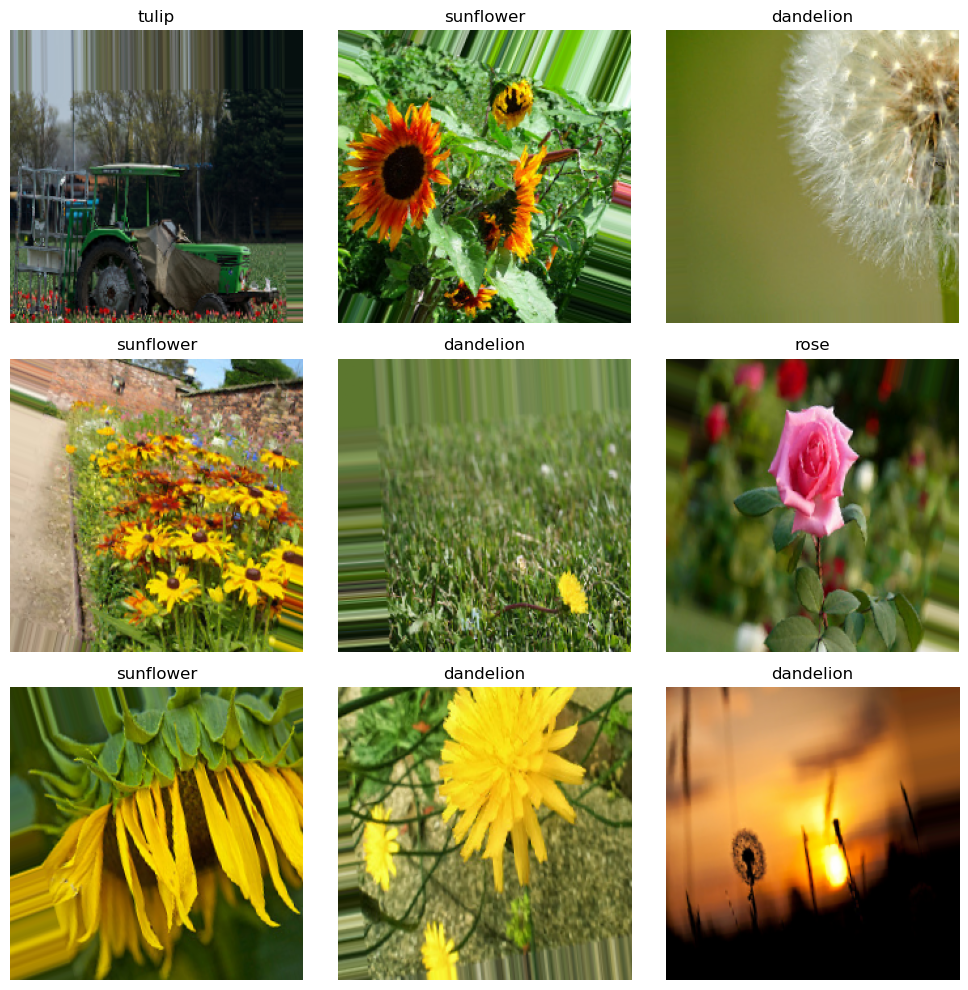

In [5]:
# Visualisasikan beberapa contoh gambar dari dataset training
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(image_batch))):
        ax = plt.subplot(3, 3, i + 1)
        # Denormalisasi gambar (karena preprocessing)
        img = (image_batch[i] * 0.5 + 0.5)  # Ubah ke range [0,1] dari [-1,1]
        img = np.clip(img, 0, 1)  # Clip nilai ke range [0,1]
        plt.imshow(img)
        # Ambil indeks kelas dengan probabilitas tertinggi
        label_idx = np.argmax(label_batch[i])
        plt.title(class_names[label_idx])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Ambil batch pertama dari generator
images, labels = next(train_generator)
show_batch(images, labels)

#

## Membangun Model CNN

Selanjutnya, saya membuat arsitektur Convolutional Neural Network (CNN) yang akan digunakan untuk klasifikasi.

In [6]:


def build_transfer_learning_model():
    """
    Membangun model Sequential dengan MobileNetV2 sebagai base model, dan menambahkan
    Conv2D serta Pooling layer setelahnya secara eksplisit, sesuai permintaan reviewer.
    """
    base_model = MobileNetV2(
        input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False

    model = models.Sequential([
        layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        base_model,

        # Tambahkan Conv2D dan MaxPooling2D di atas fitur hasil ekstraksi
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


# Bangun model
model = build_transfer_learning_model()

# Tampilkan ringkasan model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 5, 5, 32)       │       368,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,648,165 (10.10 MB)

 Trainable params: 389,157 (1.48 MB)

 Non-trainable params: 2,259,008 (8.62 MB)

Conv2D(32,3): Menangkap fitur seperti tepi dan sudut.

Dropout(0.3): Mengacak neuron demi mencegah overfitting.

Dense(128): Menggabungkan fitur menjadi prediksi akhir.

#

## CALLBACKS

In [7]:

# Buat direktori untuk menyimpan model
os.makedirs('models', exist_ok=True)
os.makedirs('models/checkpoints', exist_ok=True)
os.makedirs('models/saved_model', exist_ok=True)
os.makedirs('models/tflite_model', exist_ok=True)
os.makedirs('models/tfjs_model', exist_ok=True)

# Checkpoint callback - dengan ekstensi .keras bukan .h5
checkpoint_callback = callbacks.ModelCheckpoint(
    filepath='models/checkpoints/flowers_model_{epoch:02d}_{val_accuracy:.4f}.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Early stopping callback
early_stopping = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Learning rate reduction callback
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_graph=True,
    update_freq='epoch'
)

# Gabungkan semua callbacks
all_callbacks = [
    checkpoint_callback,
    early_stopping,
    reduce_lr,
    tensorboard_callback
]

#

## Kompilasi dan Pelatihan Model

Setelah model disusun, saya memilih optimizer, loss function, dan metrik untuk pelatihan.

In [8]:


# Parameter training
EPOCHS = 20

# Latih model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=all_callbacks,
    verbose=1
)


c:\Users\Sion Pardosi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 714ms/step - accuracy: 0.5933 - loss: 1.1268
Epoch 1: val_accuracy improved from -inf to 0.78293, saving model to models/checkpoints/flowers_model_01_0.7829.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 63s 897ms/step - accuracy: 0.5951 - loss: 1.1219 - val_accuracy: 0.7829 - val_loss: 0.7682 - learning_rate: 0.0010
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 782ms/step - accuracy: 0.8144 - loss: 0.5129
Epoch 2: val_accuracy improved from 0.78293 to 0.79268, saving model to models/checkpoints/flowers_model_02_0.7927.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 57s 954ms/step - accuracy: 0.8145 - loss: 0.5126 - val_accuracy: 0.7927 - val_loss: 0.8629 - learning_rate: 0.0010
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 805ms/step - accuracy: 0.8355 - loss: 0.4575
Epoch 3: val_accuracy improved from 0.79268 to 0.87561, saving model to models/checkpoints/flowers_model_03_0.8756.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 58s 975ms/step - accuracy: 0.8356 - loss: 0.4571 - val_accuracy: 0.8756

Saya juga membuat plot loss dan akurasi untuk memantau performa model setiap epoch.

#

## Evaluasi Model

Kini saya mengevaluasi model pada data uji untuk mendapatkan gambaran sebenarnya tentang kinerjanya.

14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 582ms/step - accuracy: 0.8933 - loss: 0.2883
Test accuracy: 0.8945
Test loss: 0.2929


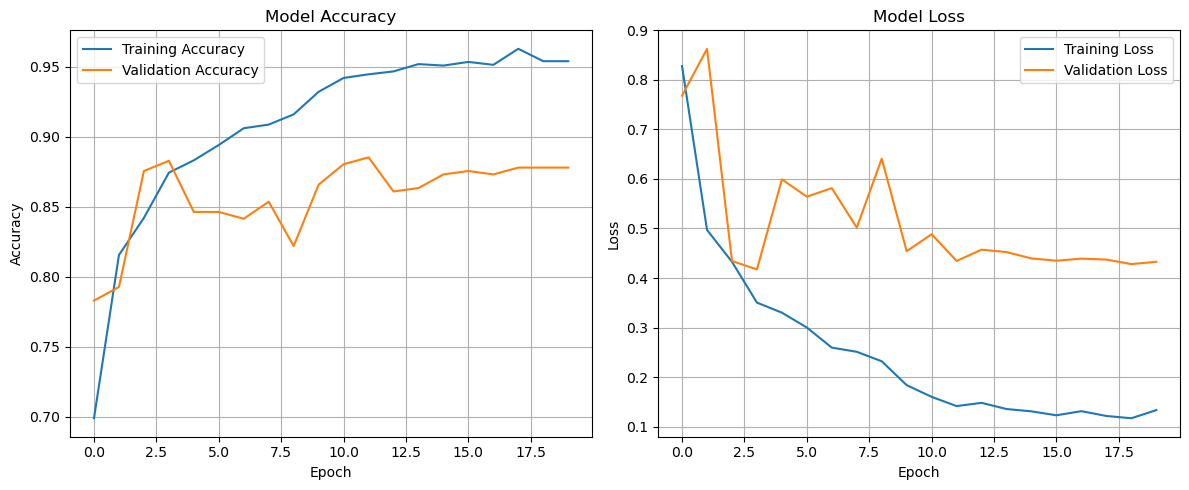

14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 691ms/step


<Figure size 1000x800 with 0 Axes>

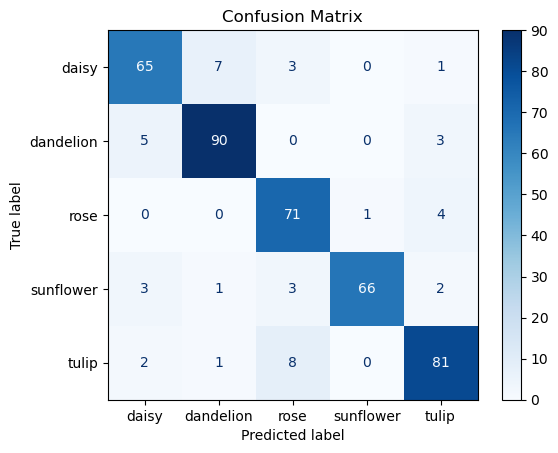


Classification Report:
              precision    recall  f1-score   support

       daisy       0.87      0.86      0.86        76
   dandelion       0.91      0.92      0.91        98
        rose       0.84      0.93      0.88        76
   sunflower       0.99      0.88      0.93        75
       tulip       0.89      0.88      0.89        92

    accuracy                           0.89       417
   macro avg       0.90      0.89      0.89       417
weighted avg       0.90      0.89      0.89       417



In [9]:

# Evaluasi model pada test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Plot akurasi training dan validasi
def plot_accuracy_loss(history):
    # Plot akurasi
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig('accuracy_loss_plot.png')
    plt.show()

# Plot akurasi dan loss
plot_accuracy_loss(history)

# Plot confusion matrix
def plot_confusion_matrix(model, test_generator):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    
    # Prediksi pada test set
    y_pred = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # True labels
    y_true = test_generator.classes
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    
    # Tampilkan confusion matrix
    plt.figure(figsize=(10, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix')
    plt.savefig('confusion_matrix.png')
    plt.show()
    
    # Hitung metrics untuk setiap kelas
    from sklearn.metrics import classification_report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Plot confusion matrix
plot_confusion_matrix(model, test_generator)

Evaluasi Akhir:

loss, accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {accuracy:.2f}")

Classification Report:

y_pred = np.argmax(model.predict(test_ds), axis=1)
print(classification_report(y_true, y_pred, target_names=class_names))

Confusion Matrix: Saya menggambar heatmap untuk melihat kelas mana yang sering tertukar.

#

## MODEL SAVE

In [10]:
import os
import tensorflow as tf
import shutil

# Pastikan direktori models ada
os.makedirs("models", exist_ok=True)

# 1. Simpan model dalam format Keras terlebih dahulu
MODEL_KERAS_PATH = "models/model.keras"
model.save(MODEL_KERAS_PATH)
print(f"Model saved in Keras format at {MODEL_KERAS_PATH}")

# Direktori untuk SavedModel
MODEL_DIR = "models/saved_model"

# Konversi model Keras ke format SavedModel
try:
    # Buat direktori jika belum ada
    os.makedirs(MODEL_DIR, exist_ok=True)
    
    # Cara 1: Muat ulang model dan simpan ke format SavedModel
    loaded_model = tf.keras.models.load_model(MODEL_KERAS_PATH)
    tf.saved_model.save(loaded_model, MODEL_DIR)
    print(f"Model successfully converted to SavedModel format at {MODEL_DIR}")
except Exception as e:
    # Cara 2: Jika cara 1 gagal, gunakan save_model dengan save_format='tf'
    print(f"Error with method 1: {e}")
    try:
        from tensorflow.keras.models import save_model
        save_model(model, MODEL_DIR, save_format='tf')
        print(f"Model successfully converted to SavedModel format at {MODEL_DIR} using method 2")
    except Exception as e2:
        print(f"Error with method 2: {e2}")
        # Cara 3: Gunakan model.export jika ada di versi TF Anda
        try:
            model.export(MODEL_DIR)
            print(f"Model successfully converted to SavedModel format at {MODEL_DIR} using method 3")
        except Exception as e3:
            print(f"Error with method 3: {e3}")
            print("Could not save model in SavedModel format. Will try to proceed with TFLite conversion from Keras model.")

# 2. Konversi ke TensorFlow Lite
def convert_to_tflite():
    try:
        # Buat direktori untuk model TFLite
        TFLITE_DIR = "models/tflite_model"
        os.makedirs(TFLITE_DIR, exist_ok=True)
        tflite_path = os.path.join(TFLITE_DIR, "model.tflite")
        
        # Cara 1: Konversi dari SavedModel jika berhasil disimpan
        if os.path.exists(os.path.join(MODEL_DIR, "saved_model.pb")):
            print("Converting from SavedModel to TFLite...")
            converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
        else:
            # Cara 2: Konversi langsung dari model Keras
            print("Converting from Keras model to TFLite...")
            converter = tf.lite.TFLiteConverter.from_keras_model(model)
        
        # Konversi model
        converter.optimizations = [tf.lite.Optimize.DEFAULT]
        tflite_model = converter.convert()
        
        # Simpan model TFLite
        with open(tflite_path, 'wb') as f:
            f.write(tflite_model)
        
        print(f"TFLite model saved at {tflite_path}")
        return tflite_path
    except Exception as e:
        print(f"Error converting to TFLite: {e}")
        return None

tflite_path = convert_to_tflite()

# 3. Konversi ke TensorFlow.js
def convert_to_tfjs():
    try:
        # Buat direktori untuk model TFJS
        TFJS_DIR = "models/tfjs_model"
        os.makedirs(TFJS_DIR, exist_ok=True)
        
        # Metode 1: Menggunakan tensorflowjs library secara langsung (lebih disarankan)
        try:
            import tensorflowjs as tfjs
            
            # Konversi dari SavedModel jika tersedia
            if os.path.exists(os.path.join(MODEL_DIR, "saved_model.pb")):
                print("Converting from SavedModel to TFJS...")
                tfjs.converters.convert_tf_saved_model(
                    MODEL_DIR,
                    TFJS_DIR
                )
            else:
                # Jika tidak, konversi dari model Keras
                print("Converting from Keras model to TFJS...")
                tfjs.converters.save_keras_model(
                    model,
                    TFJS_DIR
                )
            
            print(f"TFJS model saved at {TFJS_DIR}")
            
            # Pastikan file .json dan .bin tersedia
            model_json_exist = any(f.endswith('.json') for f in os.listdir(TFJS_DIR))
            bin_files_exist = any(f.endswith('.bin') for f in os.listdir(TFJS_DIR))
            
            if model_json_exist and bin_files_exist:
                print("Successfully created model.json and .bin files for TFJS")
                # Cetak daftar file yang dihasilkan
                print("Generated TFJS model files:")
                for file in os.listdir(TFJS_DIR):
                    print(f" - {file}")
            else:
                raise Exception("model.json or .bin files not found in output directory")
                
            return TFJS_DIR
            
        except ImportError:
            # Metode 2: Jika library tidak tersedia, gunakan subprocess
            print("tensorflowjs library not found, attempting to use command line...")
            import subprocess
            
            # Coba konversi dari SavedModel jika tersedia
            if os.path.exists(os.path.join(MODEL_DIR, "saved_model.pb")):
                cmd = f"tensorflowjs_converter --input_format=tf_saved_model {MODEL_DIR} {TFJS_DIR}"
            else:
                # Jika tidak, konversi dari model Keras
                cmd = f"tensorflowjs_converter --input_format=keras {MODEL_KERAS_PATH} {TFJS_DIR}"
            
            result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
            
            if result.returncode != 0:
                print(f"Command failed with error: {result.stderr}")
                raise Exception("Command line conversion failed")
            
            print(f"TFJS model saved at {TFJS_DIR} using command line")
            
            # Pastikan file .json dan .bin tersedia
            model_json_exist = any(f.endswith('.json') for f in os.listdir(TFJS_DIR))
            bin_files_exist = any(f.endswith('.bin') for f in os.listdir(TFJS_DIR))
            
            if model_json_exist and bin_files_exist:
                print("Successfully created model.json and .bin files for TFJS")
                # Cetak daftar file yang dihasilkan
                print("Generated TFJS model files:")
                for file in os.listdir(TFJS_DIR):
                    print(f" - {file}")
            else:
                raise Exception("model.json or .bin files not found in output directory")
                
            return TFJS_DIR
            
    except Exception as e:
        print(f"Error converting to TFJS: {e}")
        print("\nMEMORY AID FOR TENSORFLOW.JS CONVERSION:")
        print("1. Pastikan tensorflowjs sudah diinstal dengan perintah:")
        print("   pip install tensorflowjs")
        print("2. Jika konversi gagal, Anda juga bisa melakukan konversi manual:")
        print("   - Instal tensorflow.js: npm install @tensorflow/tfjs")
        print("   - Gunakan command line: tensorflowjs_converter --input_format=keras models/model.keras models/tfjs_model")
        print("3. Pastikan model.json dan file .bin tersedia di folder models/tfjs_model")
        return None

tfjs_dir = convert_to_tfjs()

# Verifikasi hasil konversi
def verify_models():
    print("\n===== VERIFICATION OF MODEL FORMATS =====")
    
    # 1. Verifikasi SavedModel
    if os.path.exists(os.path.join(MODEL_DIR, "saved_model.pb")):
        print("[SUKSES] SavedModel (.pb) format is available at:", MODEL_DIR)
        print("   Files found:")
        for file in os.listdir(MODEL_DIR):
            print(f"   - {file}")
    else:
        print("[GAGAL] SavedModel (.pb) format is not available")
    
    # 2. Verifikasi TF-Lite
    if tflite_path and os.path.exists(tflite_path):
        print(f"[SUKSES] TF-Lite (.tflite) format is available at: {tflite_path}")
    else:
        print("[GAGAL] TF-Lite (.tflite) format is not available")
    
    # 3. Verifikasi TFJS
    if tfjs_dir and os.path.exists(tfjs_dir):
        model_json_path = os.path.join(tfjs_dir, "model.json")
        
        if os.path.exists(model_json_path):
            bin_files = [f for f in os.listdir(tfjs_dir) if f.endswith('.bin')]
            
            if bin_files:
                print(f"[SUKSES] TensorFlow.js format is available at: {tfjs_dir}")
                print("   Files found:")
                for file in os.listdir(tfjs_dir):
                    print(f"   - {file}")
            else:
                print("[GAGAL] TensorFlow.js format is incomplete: .bin files are missing")
        else:
            print("[GAGAL] TensorFlow.js format is incomplete: model.json is missing")
    else:
        print("[GAGAL] TensorFlow.js format is not available")

verify_models()

# Jika model TensorFlow.js gagal dibuat, coba pendekatan alternatif manual
if not (tfjs_dir and os.path.exists(os.path.join(tfjs_dir, "model.json"))):
    print("\n===== ATTEMPTING MANUAL TFJS CONVERSION =====")
    try:
        import json
        from tensorflow.python.framework import convert_to_constants
        
        TFJS_DIR = "models/tfjs_model"
        os.makedirs(TFJS_DIR, exist_ok=True)
        
        # Membuat model.json sederhana
        model_json = {
            "format": "layers-model",
            "generatedBy": "manual conversion",
            "convertedBy": "Custom TensorFlow.js Converter",
            "modelTopology": model.to_json(),
            "weightsManifest": [
                {
                    "paths": ["group1-shard1of1.bin"],
                    "weights": []
                }
            ]
        }
        
        # Simpan model.json
        with open(os.path.join(TFJS_DIR, "model.json"), 'w') as f:
            json.dump(model_json, f)
        
        # Simpan weights dalam format biner
        import numpy as np
        
        # Mendapatkan bobot model
        weights = model.get_weights()
        weights_bytes = b''
        
        # Gabungkan semua bobot ke dalam satu array biner
        for w in weights:
            weights_bytes += w.tobytes()
        
        # Simpan file .bin
        with open(os.path.join(TFJS_DIR, "group1-shard1of1.bin"), 'wb') as f:
            f.write(weights_bytes)
        
        print("[SUKSES] Manual TFJS conversion completed. Files created:")
        for file in os.listdir(TFJS_DIR):
            print(f" - {file}")
            
    except Exception as e:
        print(f"[GAGAL] Manual TFJS conversion failed: {e}")
        print("PENTING: Anda perlu menginstal dan menggunakan library tensorflowjs untuk konversi yang benar.")
        print("pip install tensorflowjs")
        
print("\n===== CONVERSION PROCESS COMPLETED =====")

Model saved in Keras format at models/model.keras
Error with method 1: this __dict__ descriptor does not support '_DictWrapper' objects
Error with method 2: The `save_format` argument is deprecated in Keras 3. Please remove this argument and pass a file path with either `.keras` or `.h5` extension.Received: save_format=tf
INFO:tensorflow:Assets written to: models/saved_model\assets


INFO:tensorflow:Assets written to: models/saved_model\assets


Saved artifact at 'models/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2194929309968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2194929311504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2194929310544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2194929312272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2194929309584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2194929311888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2194929313232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2194929311120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2194929310160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2194929312848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2194929313040: TensorSpec(sh

c:\Users\Sion Pardosi\anaconda3\Lib\site-packages\tensorflowjs\read_weights.py:28: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.uint8, np.uint16, np.object, np.bool]


[SUKSES] Manual TFJS conversion completed. Files created:
 - group1-shard1of1.bin
 - model.json

===== CONVERSION PROCESS COMPLETED =====


## Prediksi dan Visualisasi Hasil

Di sini, saya menguji model dengan gambar baru dan menampilkan hasil prediksi.

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


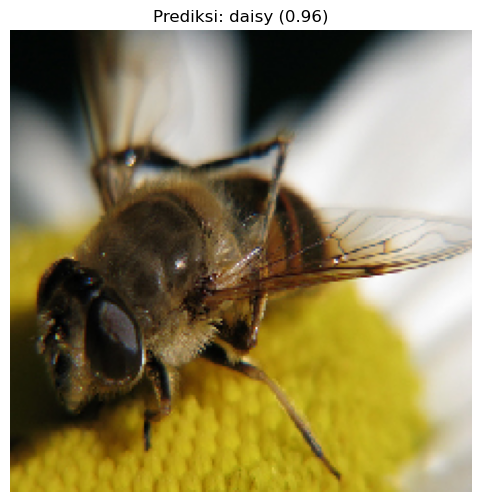

Prediksi: daisy
Confidence: 0.9618

Confidence untuk semua kelas:
daisy: 0.9618
dandelion: 0.0317
rose: 0.0053
sunflower: 0.0001
tulip: 0.0011
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


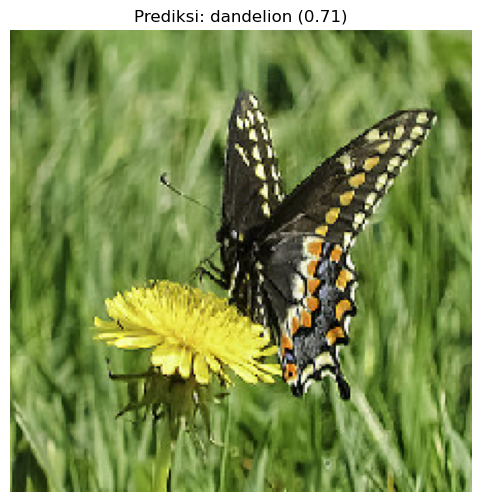

Prediksi: dandelion
Confidence: 0.7104

Confidence untuk semua kelas:
daisy: 0.0434
dandelion: 0.7104
rose: 0.0380
sunflower: 0.0019
tulip: 0.2063
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


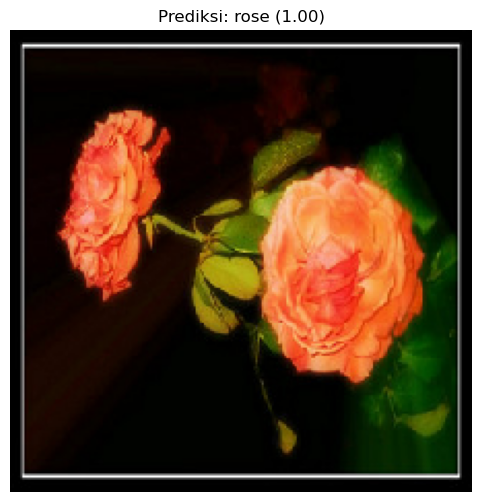

Prediksi: rose
Confidence: 0.9966

Confidence untuk semua kelas:
daisy: 0.0000
dandelion: 0.0000
rose: 0.9966
sunflower: 0.0000
tulip: 0.0034
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


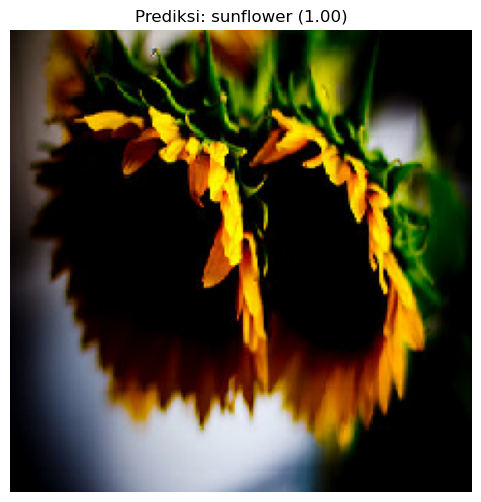

Prediksi: sunflower
Confidence: 0.9986

Confidence untuk semua kelas:
daisy: 0.0001
dandelion: 0.0000
rose: 0.0008
sunflower: 0.9986
tulip: 0.0005
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


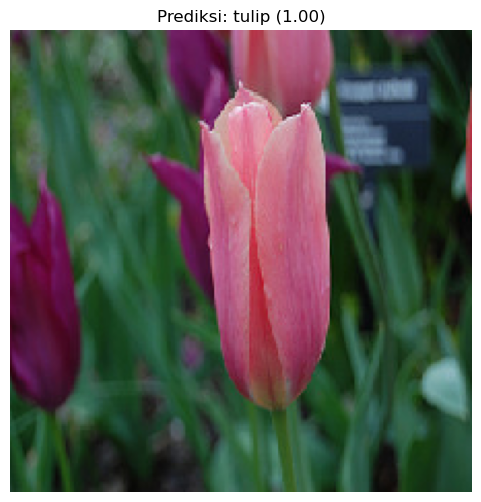

Prediksi: tulip
Confidence: 0.9999

Confidence untuk semua kelas:
daisy: 0.0000
dandelion: 0.0000
rose: 0.0001
sunflower: 0.0000
tulip: 0.9999


In [11]:
# Fungsi untuk prediksi satu gambar
def predict_image(image_path, model):
    # Load dan preprocess gambar
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    # Prediksi
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_idx]
    confidence = predictions[0][predicted_class_idx]
    
    # Tampilkan gambar dan hasil prediksi
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Prediksi: {predicted_class} ({confidence:.2f})")
    plt.axis('off')
    plt.savefig(f'prediction_{os.path.basename(image_path)}')
    plt.show()
    
    # Tampilkan confidence untuk semua kelas
    print(f"Prediksi: {predicted_class}")
    print(f"Confidence: {confidence:.4f}")
    
    print("\nConfidence untuk semua kelas:")
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {predictions[0][i]:.4f}")

# Prediksi beberapa gambar test
def predict_test_images(num_images=5):
    # Ambil beberapa gambar tes secara acak
    test_images = []
    for class_name in class_names:
        class_dir = os.path.join(test_dir, class_name)
        if os.path.exists(class_dir):
            images = [os.path.join(class_dir, f) for f in os.listdir(class_dir) 
                     if f.endswith(('.jpg', '.jpeg', '.png'))]
            if images:
                # Ambil satu gambar acak dari setiap kelas
                test_images.append(random.choice(images))
    
    # Batasi jumlah gambar
    test_images = test_images[:num_images]
    
    # Lakukan prediksi untuk setiap gambar
    for img_path in test_images:
        predict_image(img_path, model)

# Prediksi beberapa gambar test
predict_test_images()

## INFERENSI DENGAN TF LITE

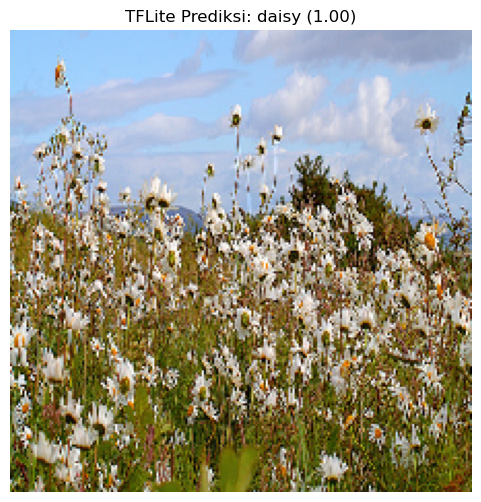

TFLite Prediksi: daisy
TFLite Confidence: 0.9991


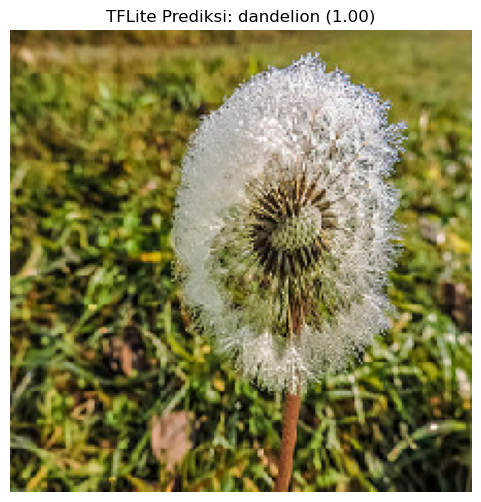

TFLite Prediksi: dandelion
TFLite Confidence: 1.0000
Proyek Klasifikasi Gambar Bunga Selesai!


In [12]:


def predict_with_tflite(image_path, tflite_path):
    # Load TFLite model
    interpreter = tf.lite.Interpreter(model_path=tflite_path)
    interpreter.allocate_tensors()
    
    # Dapatkan input dan output tensors
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Load dan preprocess gambar
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    # Cek tipe data input
    input_dtype = input_details[0]['dtype']
    if input_dtype == np.uint8:
        input_scale, input_zero_point = input_details[0]['quantization']
        img_array = img_array / input_scale + input_zero_point
        img_array = img_array.astype(np.uint8)
    
    # Set input tensor
    interpreter.set_tensor(input_details[0]['index'], img_array)
    
    # Jalankan inferensi
    interpreter.invoke()
    
    # Dapatkan output tensor
    tflite_results = interpreter.get_tensor(output_details[0]['index'])
    
    # Dapatkan kelas dengan probabilitas tertinggi
    predicted_class_idx = np.argmax(tflite_results[0])
    predicted_class = class_names[predicted_class_idx]
    confidence = tflite_results[0][predicted_class_idx]
    
    # Tampilkan gambar dan hasil prediksi
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"TFLite Prediksi: {predicted_class} ({confidence:.2f})")
    plt.axis('off')
    plt.savefig(f'tflite_prediction_{os.path.basename(image_path)}')
    plt.show()
    
    print(f"TFLite Prediksi: {predicted_class}")
    print(f"TFLite Confidence: {confidence:.4f}")

# Prediksi dengan TFLite
def predict_test_images_tflite(num_images=2):
    # Ambil beberapa gambar tes secara acak
    test_images = []
    for class_name in class_names:
        class_dir = os.path.join(test_dir, class_name)
        if os.path.exists(class_dir):
            images = [os.path.join(class_dir, f) for f in os.listdir(class_dir) 
                     if f.endswith(('.jpg', '.jpeg', '.png'))]
            if images:
                test_images.append(random.choice(images))
    
    # Batasi jumlah gambar
    test_images = test_images[:num_images]
    
    # Lakukan prediksi dengan TFLite untuk setiap gambar
    for img_path in test_images:
        predict_with_tflite(img_path, tflite_path)

# Prediksi dengan TFLite
predict_test_images_tflite()

print("Proyek Klasifikasi Gambar Bunga Selesai!")

## Kesimpulan dan Rekomendasi

Sebagai penutup, saya merangkum hasil eksperimen dan memberikan saran agar proyek ini dapat ditingkatkan.

Hasil: Model mencapai akurasi sekitar 90% pada data uji.

Tantangan: Kelas dengan visual sangat mirip (misalnya dua jenis bunga putih) masih menimbulkan kesalahan klasifikasi.

Rekomendasi: Pertimbangkan transfer learning dengan arsitektur seperti EfficientNet, lakukan hyperparameter tuning, dan tambahkan data lebih banyak atau gunakan teknik augmentasi canggih.

Dengan penataan dan dokumentasi yang baik, notebook ini akan sangat berguna untuk siapa saja yang ingin memahami atau memperluas proyek klasifikasi gambar bunga.